In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pickle

Para analizar la variabilidad anual de los viajes, usamos los datos del metro:

In [2]:
datametro = pd.read_csv("https://raw.githubusercontent.com/edtrelo/COVID19Model/main/data/rawdata/afluenciastc_simple_02_2023.csv",
                       parse_dates = ['fecha'], encoding = 'latin')

La EOD fue hecha del 23 de enero al 3 de marzo de 2017. Comparamos los datos de afluencia de estas fechas con el mismo periodo en 2020.

In [3]:
d = datametro

In [5]:
data2017 = d[("2017-01-23" <= d['fecha']) & ( d['fecha'] <= "2017-03-03")]
data2020 = d[("2020-01-27" <= d['fecha']) & ( d['fecha'] <= "2020-03-06")]

Obtenemos los datos que corresponden a fechas entre semana.

In [6]:
ES2017 = data2017[data2017['fecha'].dt.day_name().isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
ES2020 = data2020[data2020['fecha'].dt.day_name().isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]

In [7]:
ES2017 = ES2017.groupby(['fecha', 'estacion']).sum() # los agrupamos por estación para que estén ordenadas por estación.
ES2020 = ES2020.groupby(['fecha', 'estacion']).sum()

C:\Users\Edgar Trejo\AppData\Local\Temp\ipykernel_8788\940777042.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ES2017 = ES2017.groupby(['fecha', 'estacion']).sum() # los agrupamos por estación para que estén ordenadas por estación.
C:\Users\Edgar Trejo\AppData\Local\Temp\ipykernel_8788\940777042.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ES2020 = ES2020.groupby(['fecha', 'estacion']).sum()


Realizamos la prueba, donde la hipótesis nula es que las dos muestras vienen de la misma distribución.

In [8]:
stats.ks_2samp(ES2017['afluencia'], ES2020['afluencia'])

KstestResult(statistic=0.045807770961145196, pvalue=6.9768018963836e-05)

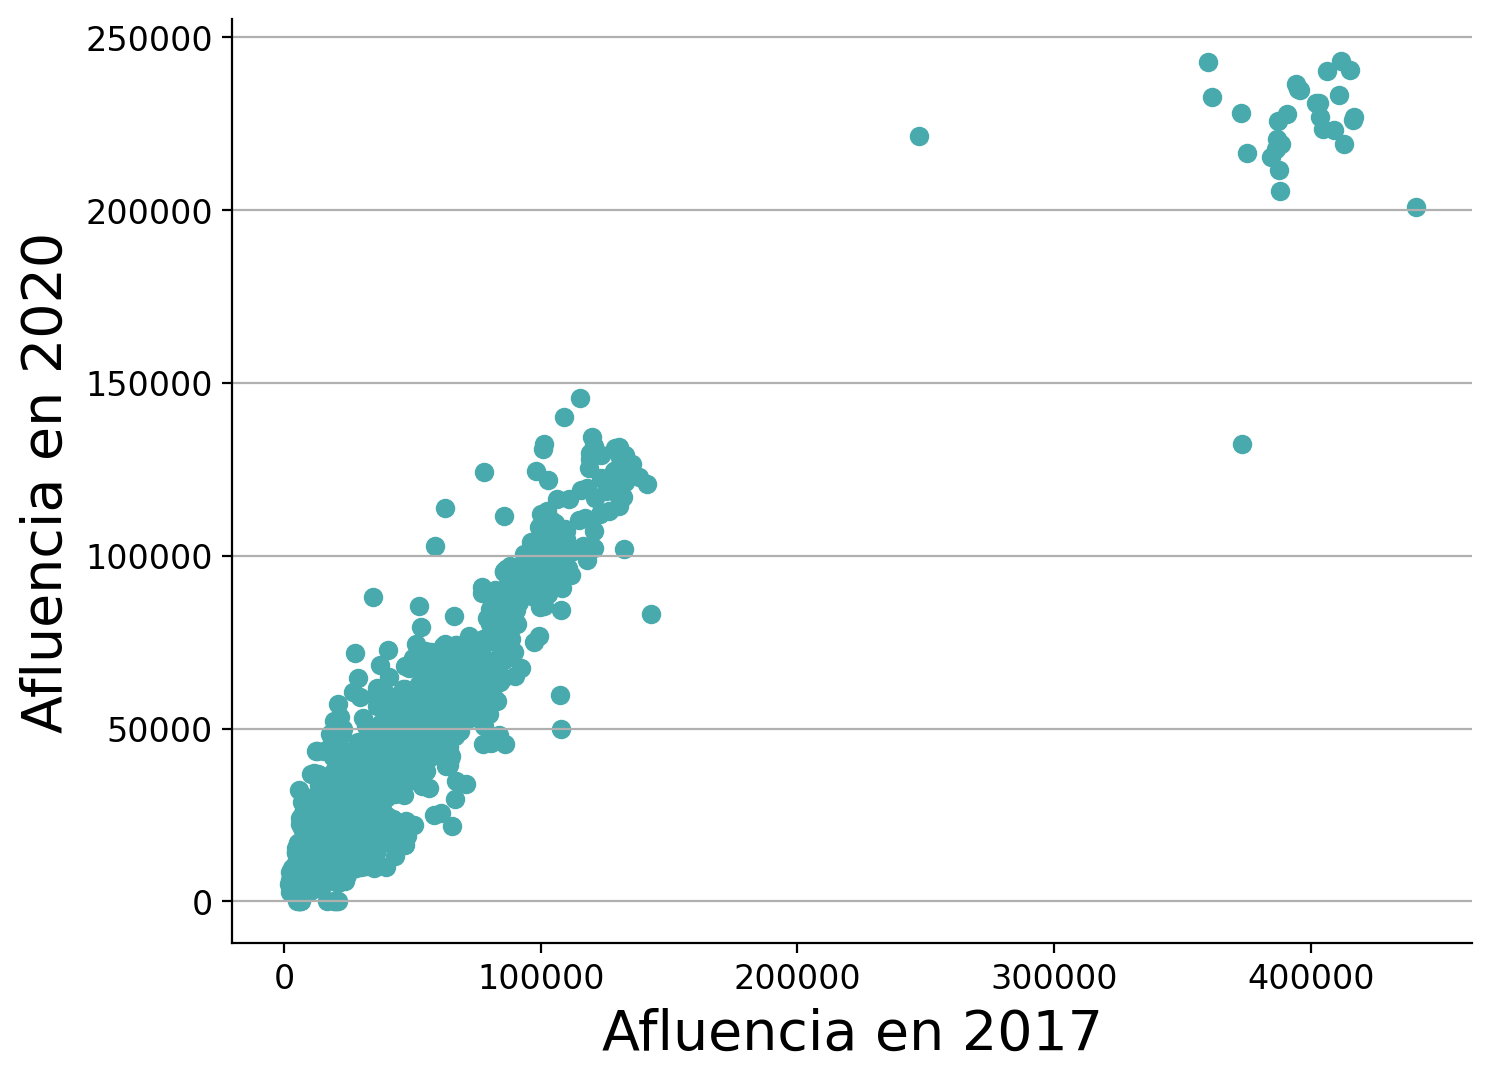

In [9]:
fig, ax = plt.subplots(figsize = (8, 6), dpi = 200)

ax.scatter(ES2017['afluencia'], ES2020['afluencia'], color = '#48aaad')
ax.set_xlabel("Afluencia en 2017", fontsize = 20)
ax.set_ylabel("Afluencia en 2020", fontsize = 20)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(axis = 'y')
plt.show()

In [10]:
stats.pearsonr(ES2017['afluencia'], ES2020['afluencia'])

PearsonRResult(statistic=0.930864702855218, pvalue=0.0)

In [11]:
data = pd.DataFrame({'2020':ES2020['afluencia'].to_numpy(), '2017':ES2017['afluencia'].to_numpy()})

In [12]:
data = data[(data['2020'] > 0) & (data['2017']>0)]

In [13]:
α = data['2020'] / data['2017']

In [14]:
xt = np.log(α)

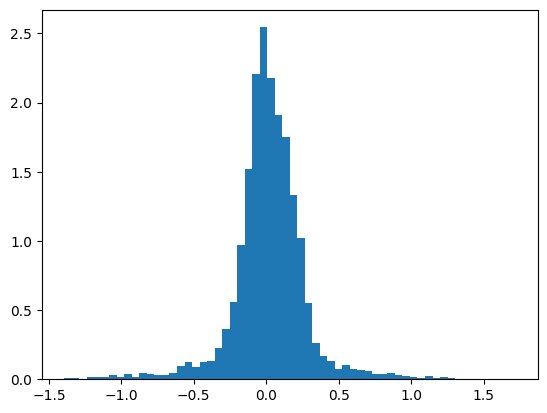

In [15]:
plt.hist(xt, bins = 60, density = True)

plt.show()

In [16]:
dist = stats.t
fit = dist.fit(xt)

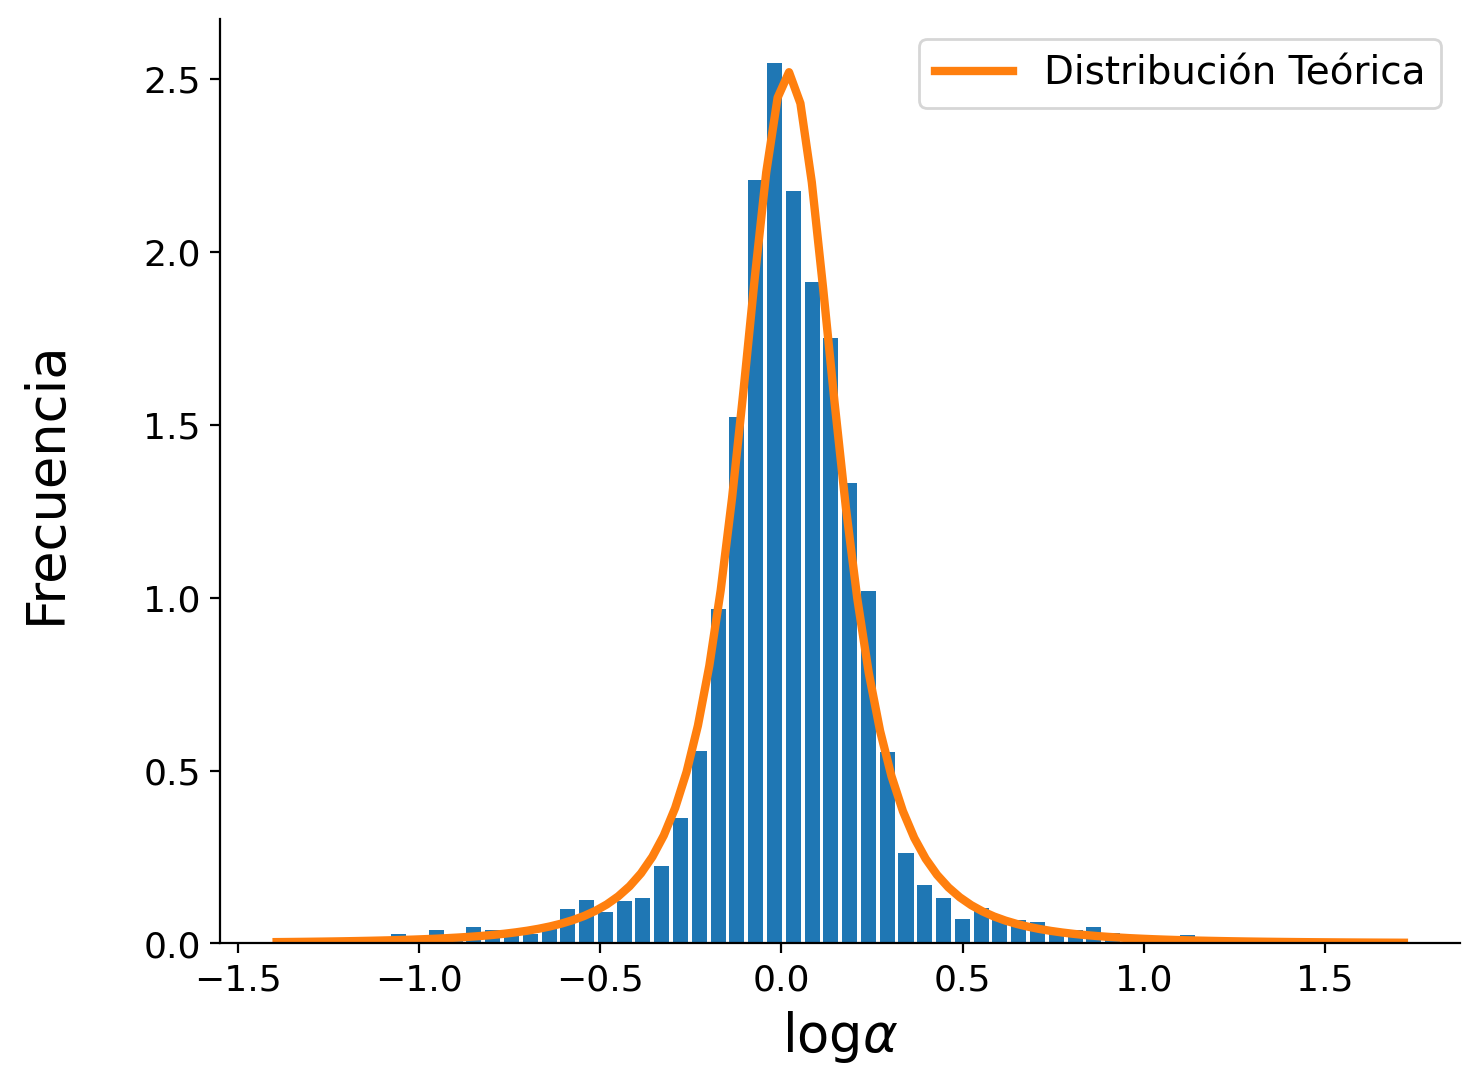

In [18]:
fig, ax = plt.subplots(figsize = (8, 6), dpi = 200)

t = np.linspace(xt.min(), xt.max(), 100)

ax.hist(xt, density = True, bins = 60, rwidth = 0.8)
ax.plot(t, dist.pdf(t, *fit), linewidth = 3, label = 'Distribución Teórica')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

ax.set_xlabel(r'$\log{\alpha}$', fontsize = 19)
ax.set_ylabel('Frecuencia\n', fontsize = 19)
ax.legend(prop = {'size':14})
plt.show()

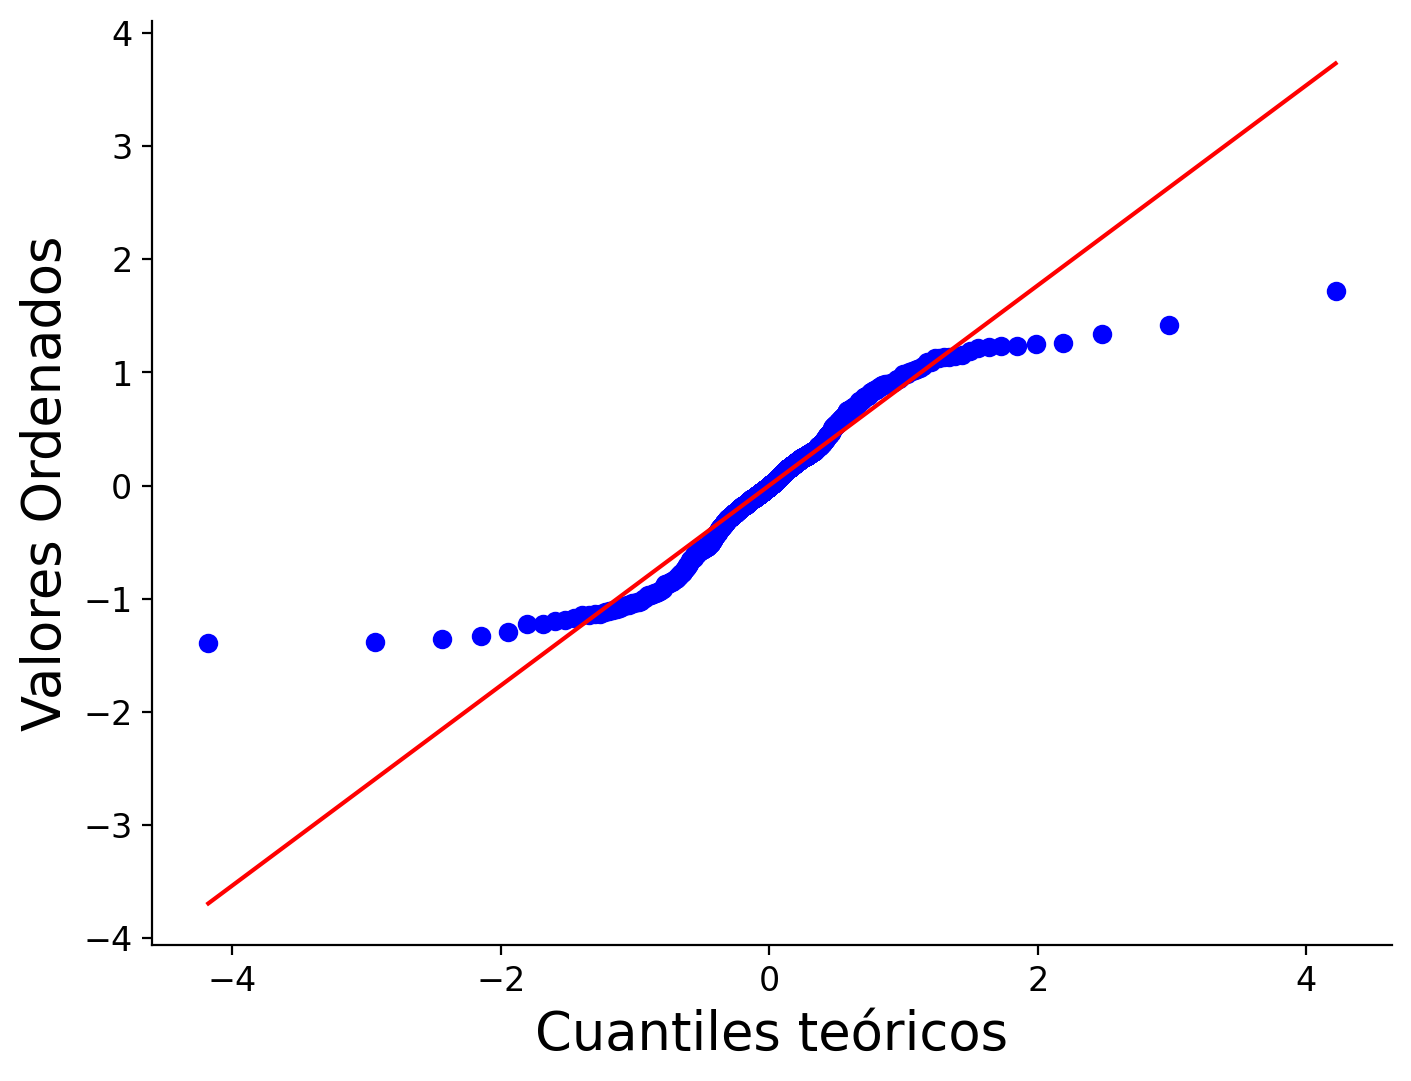

In [19]:
fig, ax = plt.subplots(figsize = (8, 6), dpi = 200)

stats.probplot(xt, dist="t", sparams =(*fit,), plot = ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_title('')
ax.set_ylabel('Valores Ordenados', fontsize = 19)
ax.set_xlabel('Cuantiles teóricos', fontsize = 19)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [20]:
stats.kstest(xt, dist.cdf, args = (*fit,) )

KstestResult(statistic=0.01790512721230486, pvalue=0.08647110858496554)

In [21]:
fit

(2.5358300265866967, 0.01915009416316822, 0.14378976740604377)

In [22]:
dictajuste = {'parms': ['df', 'loc', 'scale'], 'values':list(fit)}

In [23]:
dataf = pd.DataFrame(dictajuste)
dataf.to_csv("D:/Edgar Trejo/Universidad/Proyecto/COVID19Model/data/transformeddata/var_movilidad_anual_ajuste.csv", index=False)

Habiendo analizado la variabiliad de los viajes en días entre semana, seguimos con el análisis para fines de semana:

In [24]:
S2017 = data2017[data2017['fecha'].dt.day_name().isin(['Saturday'])]
S2020 = data2020[data2020['fecha'].dt.day_name().isin(['Saturday'])]

In [25]:
stats.ks_2samp(S2017['afluencia'], S2020['afluencia'])

KstestResult(statistic=0.038974358974358976, pvalue=0.44965425120238667)

No hay evidencia suficiente para rechazar la hipótesis que dice que los viajes en sábado en 2017 y 2020 son distintos en distribución.

In [26]:
D2017 = data2017[data2017['fecha'].dt.day_name().isin(['Sunday'])]
D2020 = data2020[data2020['fecha'].dt.day_name().isin(['Sunday'])]

In [27]:
stats.ks_2samp(D2017['afluencia'], D2020['afluencia'])

KstestResult(statistic=0.03487179487179487, pvalue=0.5939631702972729)

No hay evidencia suficiente para rechazar la hipótesis que dice que los viajes en domingo en 2017 y 2020 son distintos en distribución.